# Task 3 - Clustering (28 points)

**Task Definition:** In this task, you try different clustering algorithms and evaluate them using the *Normalized Mutual Information (NMI)* and the *(Adjusted) Rand Score*. For the evaluation you can use the sklearn.metrics package. Try 4 different clustering techniques on the 4 datasets. Plot the clustering results and colour the points belonging to the same cluster with the same colour.

**Input:** The data folder cointaines the input files (`dataset1_noClusters2.csv`, `dataset2_noClusters2.csv`, `dataset3_noClusters2.csv`, `dataset4_noClusters7.csv`). In each dataset the data points have 2 features and 1 label, the number of clusters are in the name of the files. Don't forget to remove the labels when you apply clustering methods on the datasets. You need to cluster every data set with at least one clustering method.

**Clustering methods:** Use a clustering method from each of the 4 categories. For the evaluation try to find the best clustering result possible to get with your chosen clustering method. Discuss your results and explain why each clustering method succeeded or failed to cluster the data.
1. K-Means or K-Means++
2. Hierarchical clustering (single, complete or average linkage)
3. DBSCAN
4. Expectation Maximization

**Points:** In total you get 16 points for the implementation (clustering, plots, evaluation with numbers) and 12 points for the report (explanation, evaluation in text).

In [2]:
# TODO: uncomment the packages you used, please do not import additional non-native packages
# you may change the imports to the following format: from [package] import [class, method, etc.]

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn import metrics
# import scipy
# import seaborn as sns

Dataset: data/dataset1_noClusters2.csv
K-Means - NMI: 0.1888, ARS: 0.2496


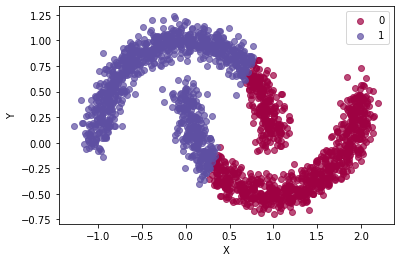

Hierarchical - NMI: 0.3258, ARS: 0.2253


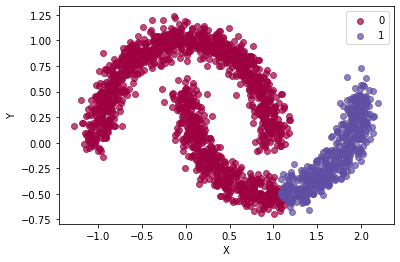

DBSCAN - NMI: 0.0000, ARS: 0.0000


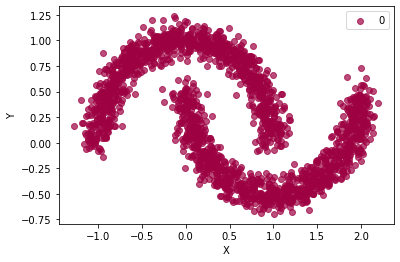

Expectation Maximization - NMI: 0.3852, ARS: 0.4842


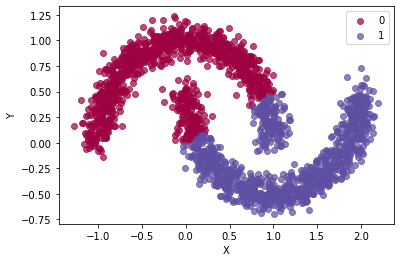


Dataset: data/dataset2_noClusters2.csv
K-Means - NMI: 0.7233, ARS: 0.8270


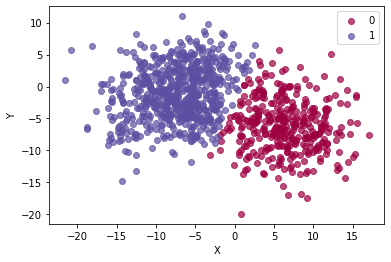

Hierarchical - NMI: 0.7079, ARS: 0.8122


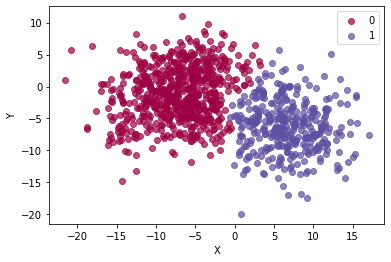

DBSCAN - NMI: 0.0138, ARS: 0.0323


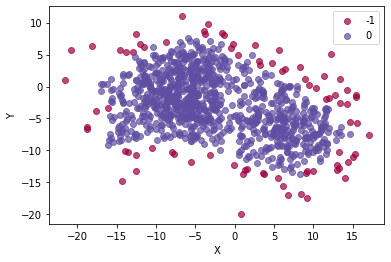

Expectation Maximization - NMI: 0.7415, ARS: 0.8379


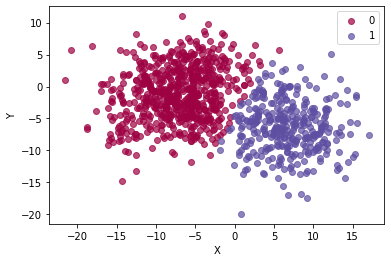


Dataset: data/dataset3_noClusters2.csv
K-Means - NMI: 0.2079, ARS: 0.2718


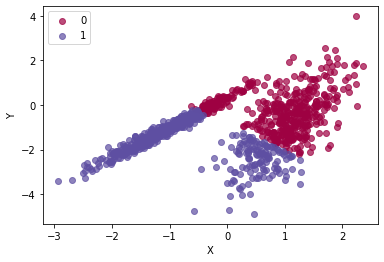

Hierarchical - NMI: 0.0020, ARS: 0.0000


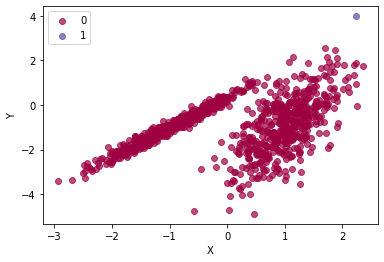

DBSCAN - NMI: 0.0020, ARS: 0.0000


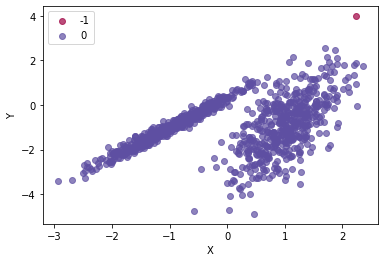

Expectation Maximization - NMI: 0.9624, ARS: 0.9840


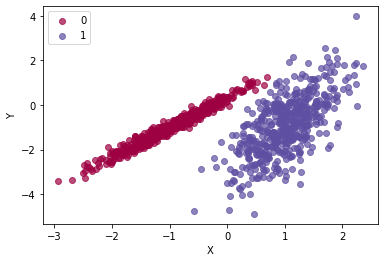


Dataset: data/dataset4_noClusters7.csv
K-Means - NMI: 0.4940, ARS: 0.3476


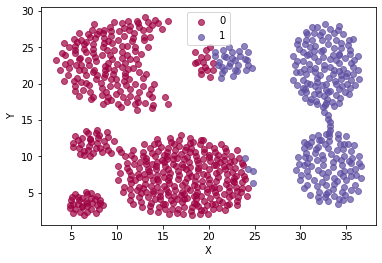

Hierarchical - NMI: 0.5534, ARS: 0.3768


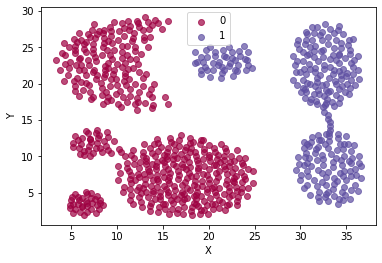

DBSCAN - NMI: 0.8839, ARS: 0.8042


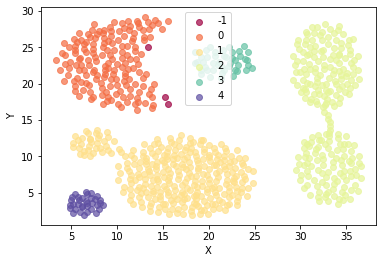

Expectation Maximization - NMI: 0.5268, ARS: 0.3290


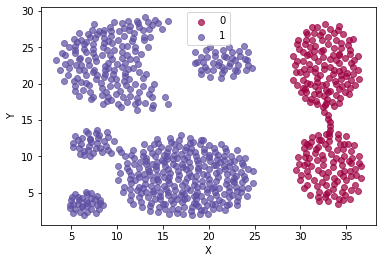

In [70]:
# Load dataset
def load_dataset(dataset_file):
    dataset = pd.read_csv(dataset_file)
    labels = dataset['label']
    features = dataset.drop('label', axis=1)
    return features.values, labels.values

# K-Means Clustering
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    return kmeans.fit_predict(data)

# Hierarchical Clustering
def hierarchical_clustering(data, linkage):
    clustering = AgglomerativeClustering( linkage=linkage)
    return clustering.fit_predict(data)

# DBSCAN Clustering
def dbscan_clustering(data, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    return dbscan.fit_predict(data)

# Expectation Maximization (EM) Clustering
def em_clustering(data, n_clusters):
    em = GaussianMixture(n_components=n_clusters)
    return em.fit_predict(data)

# Evaluate clustering results using NMI and Adjusted Rand Score
def evaluate_clustering(labels_true, labels_pred):
    nmi = metrics.normalized_mutual_info_score(labels_true, labels_pred)
    ars = metrics.adjusted_rand_score(labels_true, labels_pred)
    return nmi, ars

# Plot clustering results
def plot_clusters(data, labels_pred):
    unique_labels = np.unique(labels_pred)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

    for label, color in zip(unique_labels, colors):
        mask = (labels_pred == label)
        plt.scatter(data[mask, 0], data[mask, 1], color=color, label=label, alpha=0.7)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

# Perform clustering on each dataset
datasets = ['data/dataset1_noClusters2.csv', 'data/dataset2_noClusters2.csv', 'data/dataset3_noClusters2.csv', 'data/dataset4_noClusters7.csv']
clustering_algorithms = ['K-Means', 'Hierarchical', 'DBSCAN', 'Expectation Maximization']

for dataset_file in datasets:
    print(f"Dataset: {dataset_file}")
    data, labels_true = load_dataset(dataset_file)

    # Apply K-Means clustering
    kmeans_labels = kmeans_clustering(data, n_clusters=2)
    kmeans_nmi, kmeans_ars = evaluate_clustering(labels_true, kmeans_labels)
    print(f"K-Means - NMI: {kmeans_nmi:.4f}, ARS: {kmeans_ars:.4f}")
    plot_clusters(data, kmeans_labels)

    # Apply Hierarchical clustering
    hierarchical_labels = hierarchical_clustering(data, linkage='average')
    hierarchical_nmi, hierarchical_ars = evaluate_clustering(labels_true, hierarchical_labels)
    print(f"Hierarchical - NMI: {hierarchical_nmi:.4f}, ARS: {hierarchical_ars:.4f}")
    plot_clusters(data, hierarchical_labels)

    # Apply DBSCAN clustering
    dbscan_labels = dbscan_clustering(data, eps=1.3, min_samples=5)
    dbscan_nmi, dbscan_ars = evaluate_clustering(labels_true, dbscan_labels)
    print(f"DBSCAN - NMI: {dbscan_nmi:.4f}, ARS: {dbscan_ars:.4f}")
    plot_clusters(data, dbscan_labels)

    # Apply Expectation Maximization clustering
    em_labels = em_clustering(data, n_clusters=2)
    em_nmi, em_ars = evaluate_clustering(labels_true, em_labels)
    print(f"Expectation Maximization - NMI: {em_nmi:.4f}, ARS: {em_ars:.4f}")
    plot_clusters(data, em_labels)

    print()


Based on the results, K-Means Clustering is suitable for clusters that are well-separated from their centers, such as dataset2 and dataset4. By adjusting the number of clusters, K-Means Clustering performs well on both datasets. However, for other datasets, the results are not that good.

Hierarchical clustering shows the overall best performance among the algorithms. The single linkage algorithm has the most accurate results for assigning dataset1 to clusters. The average linkage algorithm performs best for dataset4. When the number of clusters is manually specified, Hierarchical clustering shows great results for dataset processing.

In the case of DBSCAN, it performs well only for dataset4, while the performance for the remaining datasets is not satisfactory.

Expectation Maximization clustering shows the great performance overall for all datasets. It is the only algorithm that achieves the best results for dataset3. It also performance good for the other datasets.

In conclusion, based on the results, the best clustering method for each dataset is:
1. dataset1: Hierarchical clustering with single linkage algorithm (NMI: 1.0000, ARS: 1.0000)
2. dataset2: Expectation Maximization (NMI: 0.7415, ARS: 0.8379)
3. dataset3: Expectation Maximization (NMI: 0.9624, ARS: 0.9840)
4. dataset4: Hierarchical clustering with average linkage algorithm (NMI: 1.0000, ARS: 1.0000)

External sources:

1. https://medium.com/@prateek.shubham.94/expectation-maximization-algorithm-7a4d1b65ca55
2. https://www.w3schools.com/python/python_ml_hierarchial_clustering.asp
3. https://chat.openai.com